In [15]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [62]:
install.packages('Hmisc',repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/Tom/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
also installing the dependencies 'checkmate', 'survival', 'Formula', 'latticeExtra', 'acepack', 'data.table', 'htmlTable'



package 'checkmate' successfully unpacked and MD5 sums checked
package 'survival' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'acepack' successfully unpacked and MD5 sums checked
package 'data.table' successfully unpacked and MD5 sums checked
package 'htmlTable' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tom\AppData\Local\Temp\RtmpW0s6KK\downloaded_packages


In [63]:
library(Hmisc)

Warning message:
"package 'Hmisc' was built under R version 3.3.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.3.3"Loading required package: Formula
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"
Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    combine, src, summarize

The following objects are masked from 'package:base':

    format.pval, round.POSIXt, trunc.POSIXt, units



In [16]:
setwd('C:/Users/Tom/Documents/research/foursquare')

In [17]:
alc_june = read.csv("data/alc-june.csv")
alc_sept = read.csv('data/alc-sept.csv')

In [18]:
turn_to_week <- function(df_june, df_sept){
    df_j <- df_june
    df_s <- df_sept
    df_j[,1] <- (df_j[,1] -1)%%7
    df_s[,1] <- (df_s[,1])%%7
    comb <- rbind(df_j[25:(24*28+24),], df_s[1:(24*28),])
    return(comb)
    
}

In [19]:
alc <- turn_to_week(alc_june, alc_sept)

In [20]:
proportion <- alc %>% group_by(Unnamed..0, Unnamed..1) %>% summarize(prop=sum(casual)/sum(total))

In [21]:
alc_foursquare <- read.csv('data/alc-foursquare.csv')

In [22]:
counts <- read.csv('data/counts.csv')

In [94]:
correlations <- function(ts1, ts2){
    list(pearson=cor(ts1, ts2, method='pearson'), p_value=rcorr(as.matrix(cbind(ts1, ts2)), type='pearson')$P, cross=ccf(ts1, ts2))
}

# ALCOHOL

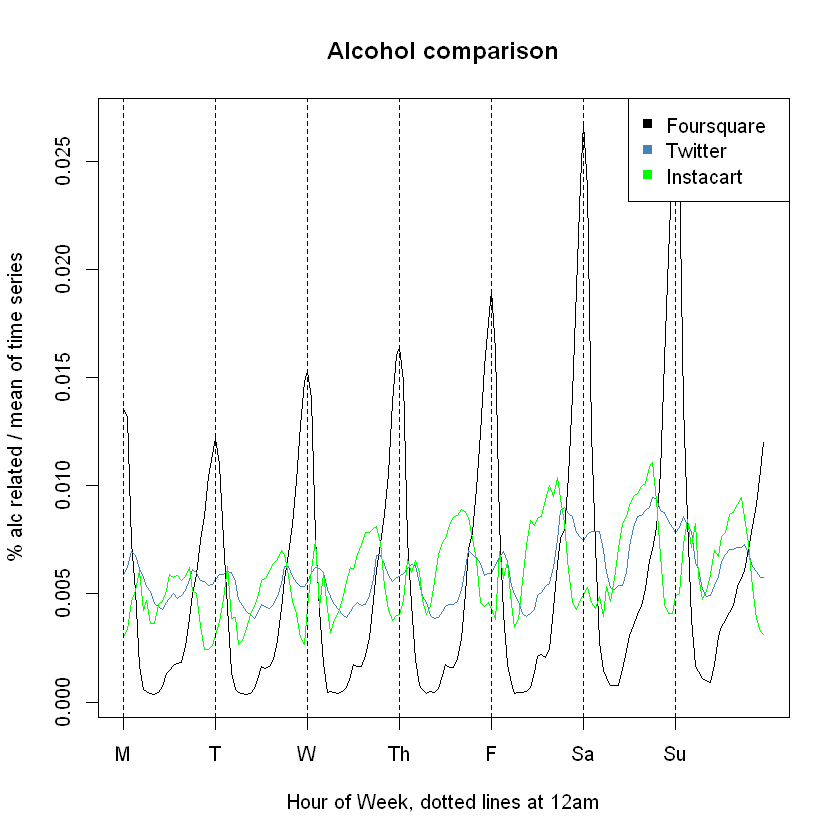

In [55]:
fs_alc <- alc_foursquare[,3]/sum(alc_foursquare[,3])
tw_alc <- proportion[,3]/sum(proportion[,3])
inst_alc <- counts[,6]/sum(counts[,6])
plot.ts(fs_alc, xaxt='n', main='Alcohol comparison', ylab='% alc related / mean of time series', xlab='Hour of Week, dotted lines at 12am')
lines(tw_alc, col='steelblue')
lines(inst_alc, col='green')
axis(side=1, at=seq(1, 168, by=24), labels=c('M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'))
abline(v=seq(1, 168, by=24), lty=2)
legend("topright", legend=c('Foursquare', 'Twitter', 'Instacart'), col=c('black', 'steelblue', 'green'),pch=15)

$pearson
          prop
[1,] 0.5353916

$p_value
              ts1         prop
ts1            NA 7.593925e-14
prop 7.593925e-14           NA

$cross

Autocorrelations of series 'X', by lag

   -19    -18    -17    -16    -15    -14    -13    -12    -11    -10     -9 
 0.414  0.347  0.233  0.092 -0.044 -0.161 -0.256 -0.335 -0.391 -0.409 -0.369 
    -8     -7     -6     -5     -4     -3     -2     -1      0      1      2 
-0.273 -0.124  0.054  0.234  0.389  0.501  0.552  0.557  0.535  0.517  0.514 
     3      4      5      6      7      8      9     10     11     12     13 
 0.516  0.505  0.451  0.349  0.202  0.036 -0.113 -0.236 -0.328 -0.397 -0.434 
    14     15     16     17     18     19 
-0.432 -0.376 -0.268 -0.120  0.044  0.203 


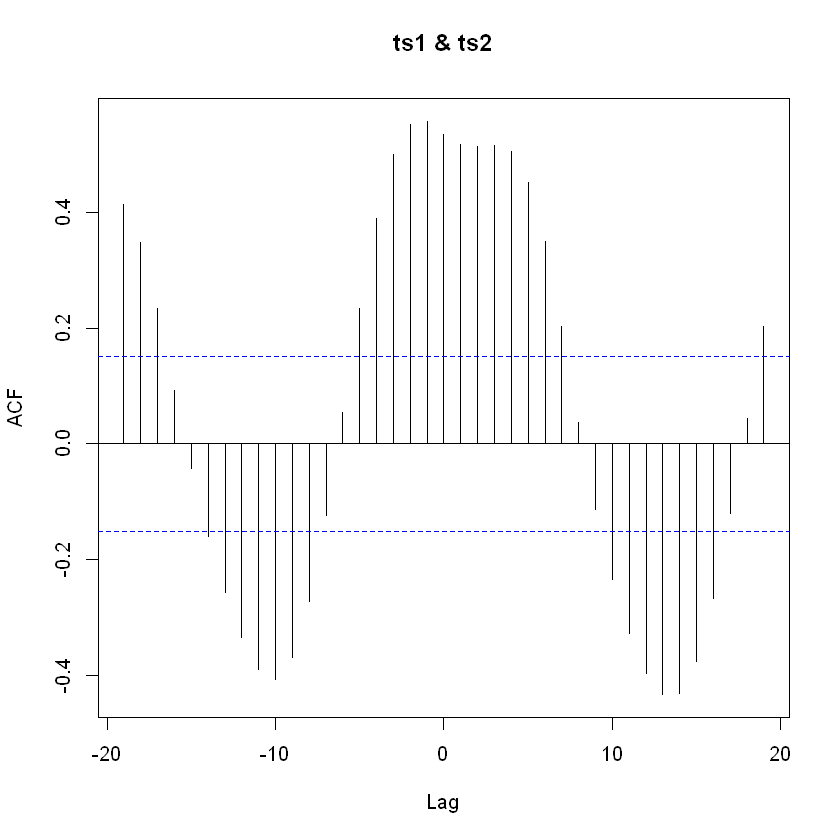

In [95]:
correlations(fs_alc, tw_alc)

$pearson
          [,1]
prop 0.3167148

$p_value
             prop          ts2
prop           NA 2.881532e-05
ts2  2.881532e-05           NA

$cross

Autocorrelations of series 'X', by lag

   -19    -18    -17    -16    -15    -14    -13    -12    -11    -10     -9 
 0.335  0.382  0.457  0.532  0.566  0.538  0.453  0.340  0.224  0.115  0.012 
    -8     -7     -6     -5     -4     -3     -2     -1      0      1      2 
-0.075 -0.156 -0.221 -0.261 -0.253 -0.169 -0.023  0.157  0.317  0.428  0.486 
     3      4      5      6      7      8      9     10     11     12     13 
 0.503  0.505  0.501  0.520  0.561  0.597  0.592  0.533  0.431  0.319  0.216 
    14     15     16     17     18     19 
 0.125  0.042 -0.034 -0.112 -0.174 -0.205 


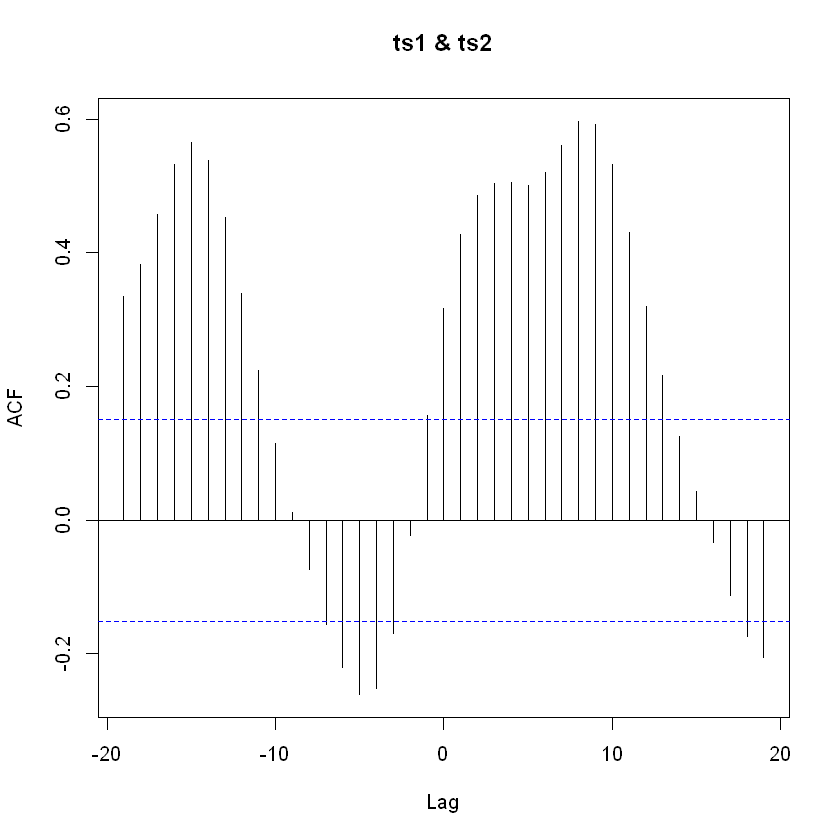

In [96]:
correlations(tw_alc, inst_alc)

$pearson
[1] -0.2418827

$p_value
            ts1         ts2
ts1          NA 0.001584246
ts2 0.001584246          NA

$cross

Autocorrelations of series 'X', by lag

   -19    -18    -17    -16    -15    -14    -13    -12    -11    -10     -9 
-0.327 -0.355 -0.344 -0.278 -0.164 -0.027  0.119  0.261  0.403  0.540  0.658 
    -8     -7     -6     -5     -4     -3     -2     -1      0      1      2 
 0.739  0.756  0.689  0.538  0.333  0.118 -0.061 -0.183 -0.242 -0.224 -0.206 
     3      4      5      6      7      8      9     10     11     12     13 
-0.206 -0.241 -0.297 -0.342 -0.349 -0.292 -0.183 -0.048  0.104  0.259  0.409 
    14     15     16     17     18     19 
 0.550  0.667  0.746  0.751  0.662  0.486 


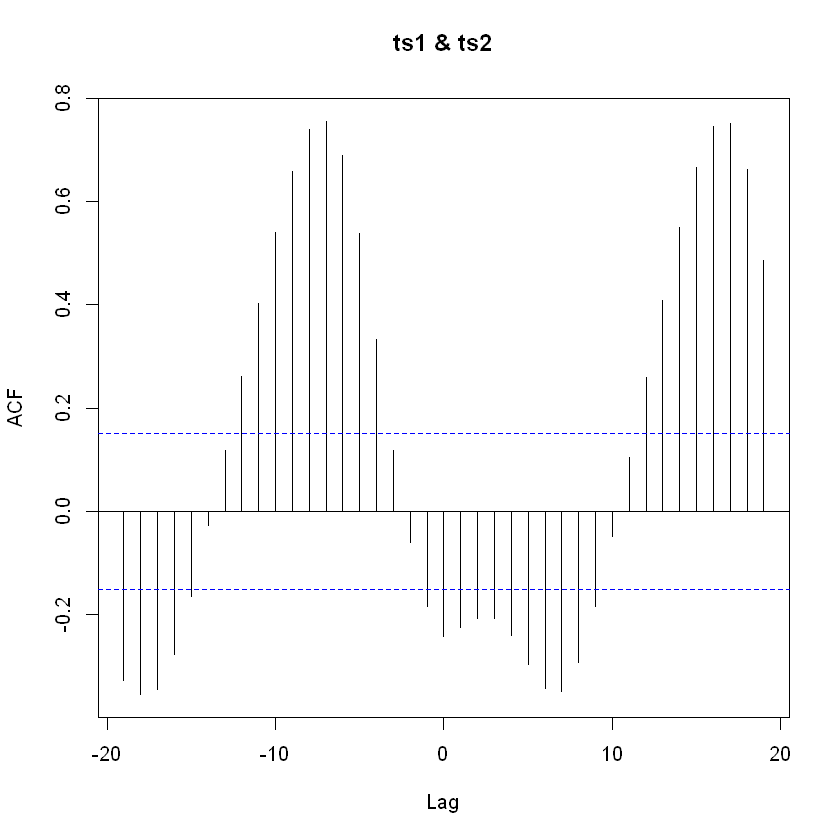

In [97]:
correlations(inst_alc, fs_alc)

In [24]:
tob_june = read.csv("data/tob-june.csv")
tob_sept = read.csv('data/tob-sept.csv')
shi_june = read.csv("data/shisha-june.csv")
shi_sept = read.csv('data/shisha-sept.csv')

In [25]:
tob <- turn_to_week(tob_june, tob_sept)
shi <- turn_to_week(shi_june, shi_sept)

In [26]:
head(tob)

,day,hour,sum,len
25,1,0,13,5661
26,1,1,9,3608
27,1,2,7,2210
28,1,3,3,1648
29,1,4,1,1384
30,1,5,1,1843


In [30]:
tob_foursquare <- read.csv('data/tob-foursquare.csv')
shi_foursquare <- read.csv('data/hookah-foursquare.csv')

In [37]:
tob_foursquare[is.na(tob_foursquare)] <- 0
shi_foursquare[is.na(shi_foursquare)] <- 0

In [28]:
prop_tob <- tob %>% group_by(day, hour) %>% summarize(prop=sum(sum)/sum(len))
prop_shi <- shi %>% group_by(day, hour) %>% summarize(prop=sum(sum)/sum(len))

# TOBACCO

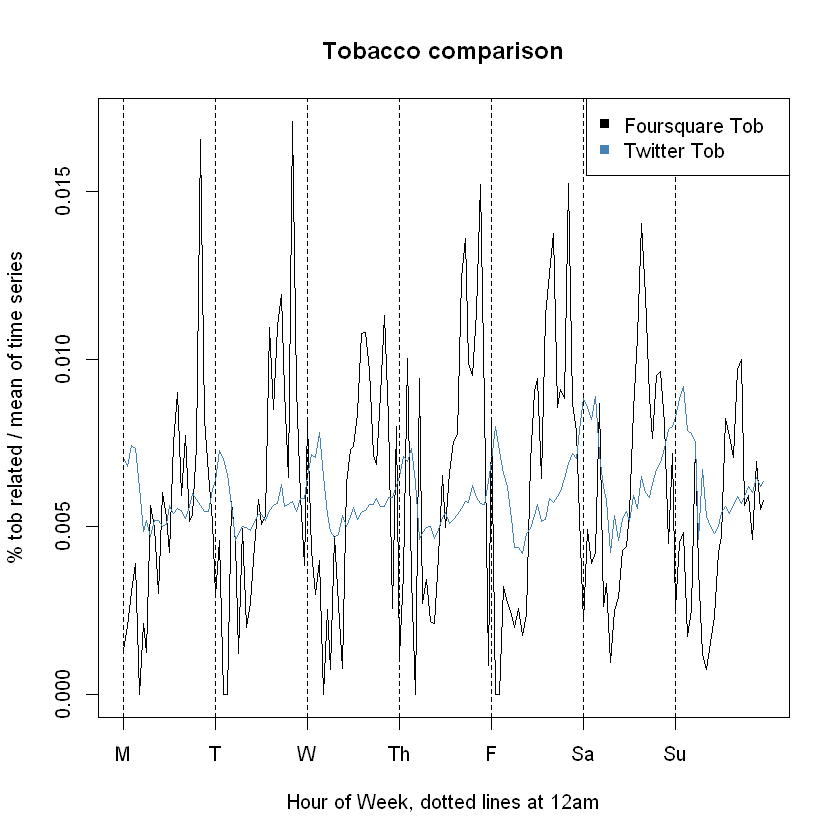

In [51]:
fs_tob <- tob_foursquare[,3]/sum(tob_foursquare[,3])
tw_tob <- prop_tob[,3]/sum(prop_tob[,3])
plot.ts(fs_tob, xaxt='n', main='Tobacco comparison', ylab='% tob related / mean of time series', xlab='Hour of Week, dotted lines at 12am')
lines(tw_tob, col='steelblue')
axis(side=1, at=seq(1, 168, by=24), labels=c('M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'))
abline(v=seq(1, 168, by=24), lty=2)
legend("topright", legend=c('Foursquare Tob', 'Twitter Tob'), col=c('black', 'steelblue'),pch=15)

$pearson
            prop
[1,] -0.04910277

$p_value
           ts1      prop
ts1         NA 0.5273384
prop 0.5273384        NA

$cross

Autocorrelations of series 'X', by lag

   -19    -18    -17    -16    -15    -14    -13    -12    -11    -10     -9 
-0.450 -0.453 -0.442 -0.381 -0.305 -0.190 -0.044  0.115  0.220  0.311  0.401 
    -8     -7     -6     -5     -4     -3     -2     -1      0      1      2 
 0.491  0.584  0.569  0.539  0.429  0.286  0.174  0.051 -0.049 -0.129 -0.220 
     3      4      5      6      7      8      9     10     11     12     13 
-0.309 -0.388 -0.470 -0.546 -0.531 -0.471 -0.379 -0.237 -0.123  0.007  0.133 
    14     15     16     17     18     19 
 0.237  0.292  0.377  0.457  0.448  0.401 


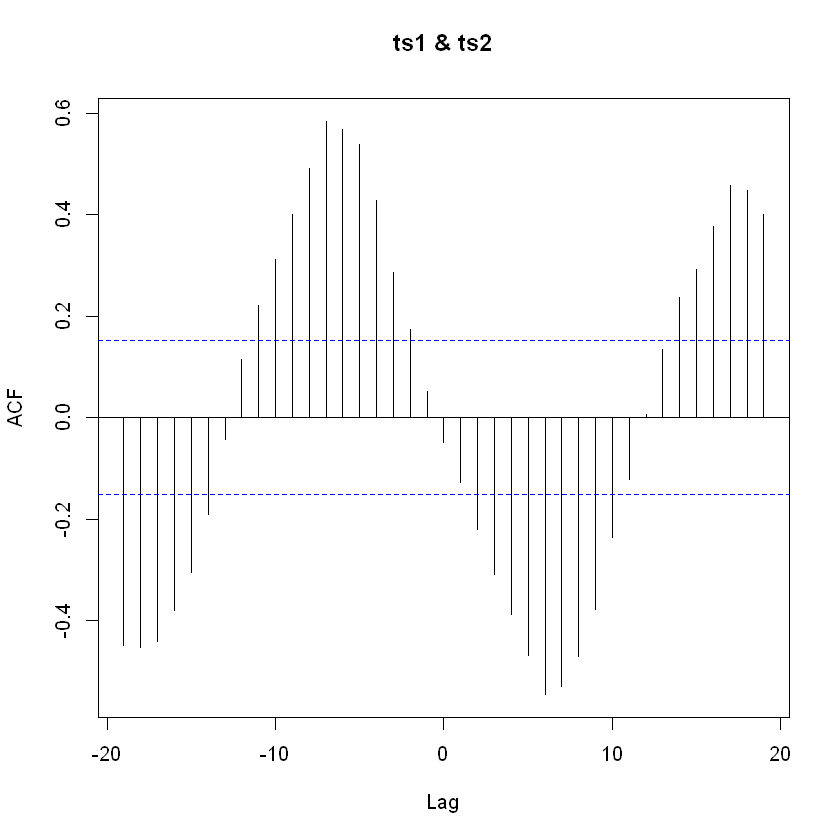

In [98]:
correlations(fs_tob, tw_tob)

# SHISHA

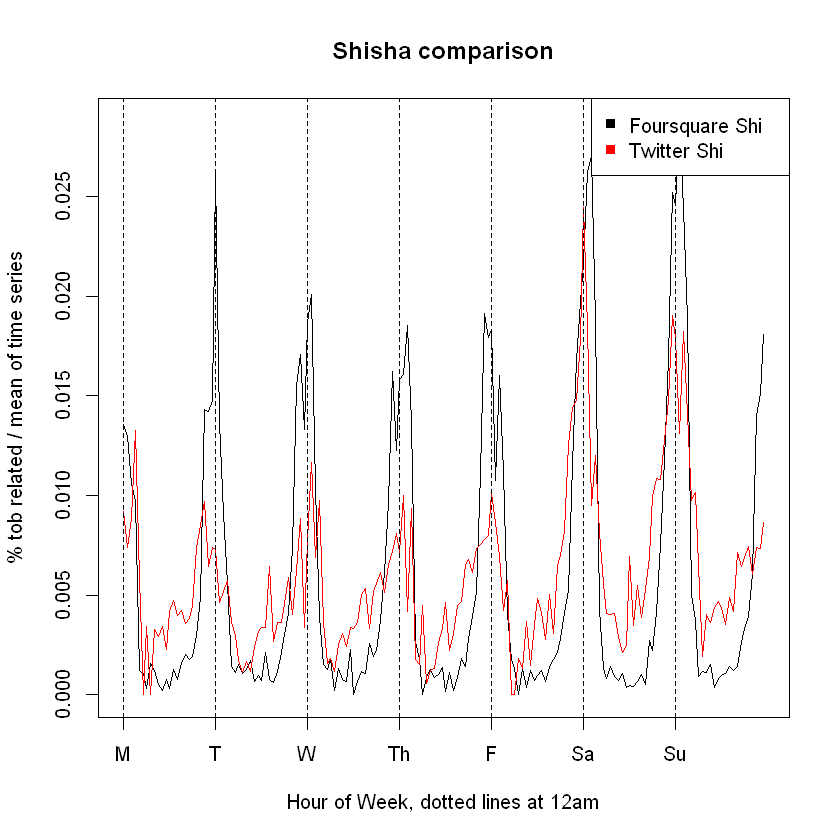

In [53]:
fs_shi <- shi_foursquare[,3]/sum(shi_foursquare[,3])
tw_shi <- prop_shi[,3]/sum(prop_shi[,3])
plot.ts(fs_shi, xaxt='n', main='Shisha comparison', ylab='% tob related / mean of time series', xlab='Hour of Week, dotted lines at 12am')
lines(tw_shi, col='red')
axis(side=1, at=seq(1, 168, by=24), labels=c('M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'))
abline(v=seq(1, 168, by=24), lty=2)
legend("topright", legend=c('Foursquare Shi', 'Twitter Shi'), col=c('black', 'red'),pch=15)

$pearson
          prop
[1,] 0.7435545

$p_value
     ts1 prop
ts1   NA    0
prop   0   NA

$cross

Autocorrelations of series 'X', by lag

   -19    -18    -17    -16    -15    -14    -13    -12    -11    -10     -9 
 0.206  0.083 -0.019 -0.121 -0.207 -0.265 -0.329 -0.377 -0.408 -0.433 -0.431 
    -8     -7     -6     -5     -4     -3     -2     -1      0      1      2 
-0.422 -0.355 -0.227 -0.073  0.107  0.340  0.514  0.660  0.744  0.729  0.681 
     3      4      5      6      7      8      9     10     11     12     13 
 0.578  0.418  0.263  0.113 -0.013 -0.129 -0.219 -0.284 -0.333 -0.381 -0.421 
    14     15     16     17     18     19 
-0.458 -0.466 -0.451 -0.385 -0.250 -0.119 


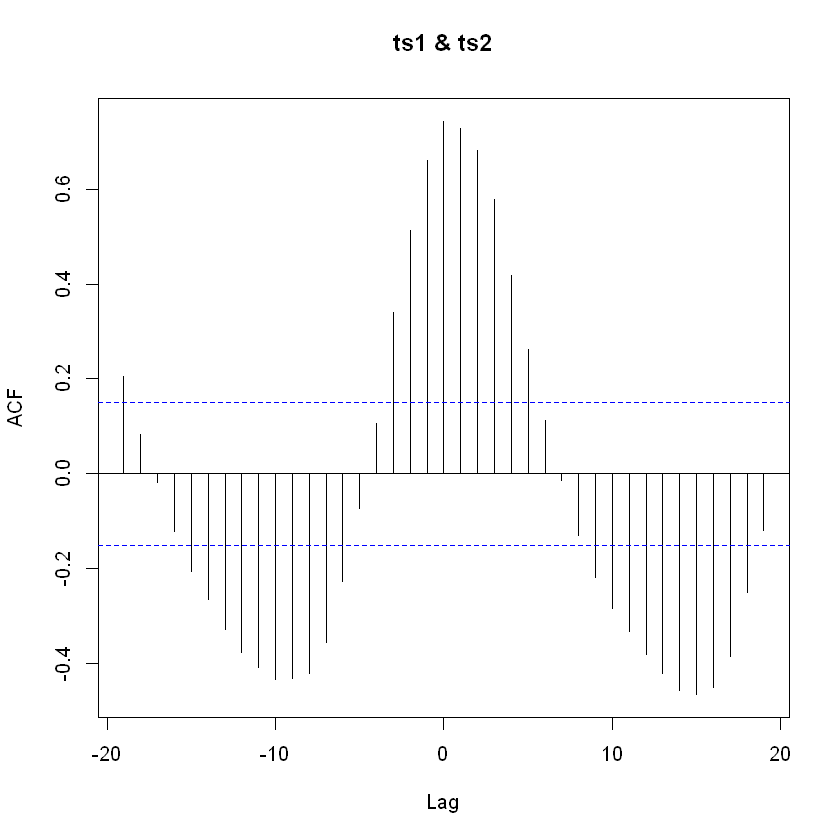

In [99]:
correlations(fs_shi, tw_shi)